# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app (as when scraped)
4. Reviews: Number of user reviews for the app (as when scraped)
5. Size: Size of the app (as when scraped)
6. Installs: Number of user downloads/installs for the app (as when scraped)
7. Type: Paid or Free
8. Price: Price of the app (as when scraped)
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
12. Current Ver: Current version of the app available on Play Store (as when scraped)
13. Android Ver: Min required Android version (as when scraped)

In [1]:
import math
import plotly_express as px
import pdb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data from the folder where I uploaded the csv file
data_clean=pd.read_csv("/Users/AirMorena/Desktop/final_proj/csv/data_clean.csv")

In [4]:
print("Shape of data (samples, features): ",data_clean.shape)

Shape of data (samples, features):  (41661, 23)


In [5]:
print("Data Types: \n", data_clean.dtypes.value_counts())

Data Types: 
 object     10
float64     8
int64       5
dtype: int64


In [6]:
#Returns the column names.
data_clean.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'Translated_Review',
 'Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity',
 'Reviewslog',
 'Current Ver_clean',
 'year',
 'month',
 'day',
 'month_year']

In [7]:
#data_clean.info()

In [8]:
#data_clean.isnull().sum()

In [9]:
data_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Reviewslog,Current Ver_clean,year,month,day,month_year
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,6.874198,2.0,2018,1,15,2018-01
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,It bad >:(,Negative,-0.725,0.833333,6.874198,2.0,2018,1,15,2018-01
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,like,Neutral,0.000,0.000000,6.874198,2.0,2018,1,15,2018-01
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,NaN,NaN,NaN,NaN,6.874198,2.0,2018,1,15,2018-01
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,I love colors inspyering,Positive,0.500,0.600000,6.874198,2.0,2018,1,15,2018-01


In [10]:
####################Univariate and Bivariate analysis

In [11]:
## Categorical variables

In [12]:
# Category

In [13]:
data_clean['App'].unique()

array(['Coloring book moana', 'Garden Coloring Book',
       '3D Color Pixel by Number - Sandbox Art Coloring', ...,
       'Diary with lock password', 'Avakin Life - 3D virtual world',
       'A+ Gallery - Photos & Videos'], dtype=object)

In [14]:
len(data_clean['App'].unique())

1020

In [15]:
data_clean['Category'].unique()

array(['ART_AND_DESIGN', 'FAMILY', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'COMICS',
       'DATING', 'TOOLS', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS',
       'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME',
       'SPORTS', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING',
       'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES',
       'MAPS_AND_NAVIGATION'], dtype=object)

In [16]:
print(len(data_clean['Category'].unique()))

33


Text(0.5, 1.0, 'Total apps entries of each Category')

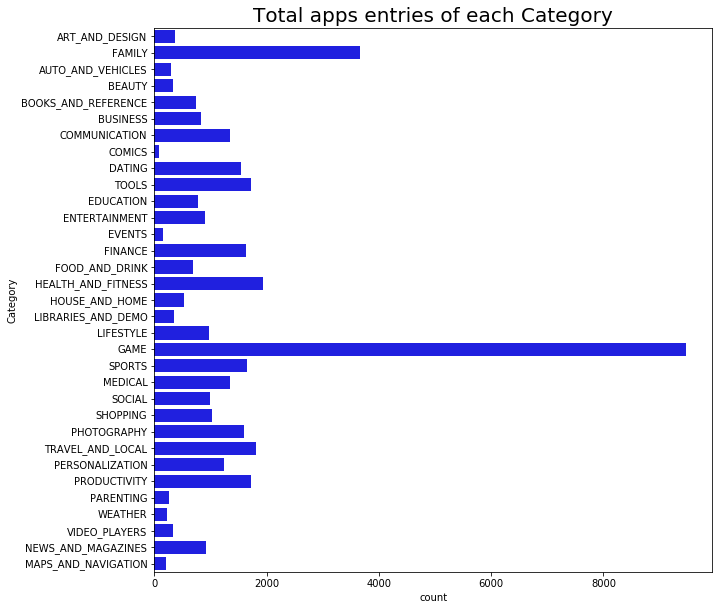

In [17]:
# countplot Category
plt.figure(figsize=(10,10))
g = sns.countplot(y="Category",data=data_clean, color = "b")
plt.title('Total apps entries of each Category',size = 20)

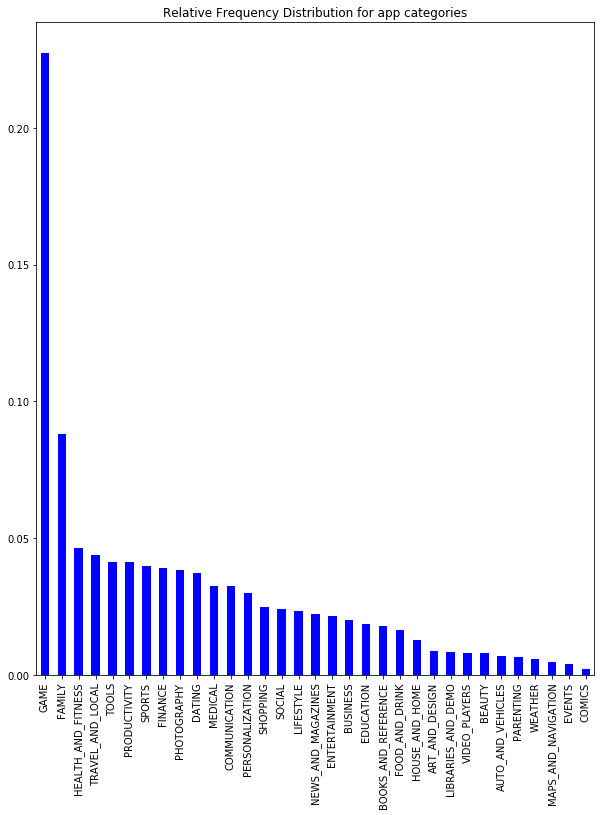

In [18]:
# Visualize frequencies of each category when we normalise (see normalise=True)
Category = data_clean['Category']
plt.figure(figsize=(10,12))
relative_freqs_type = Category.value_counts(normalize=True)
_=relative_freqs_type.plot(kind='bar', color='blue')
_=plt.title('Relative Frequency Distribution for app categories')

In [19]:
# the most prevalent category is family and games

Text(0.5, 1.0, 'Installations in each Category')

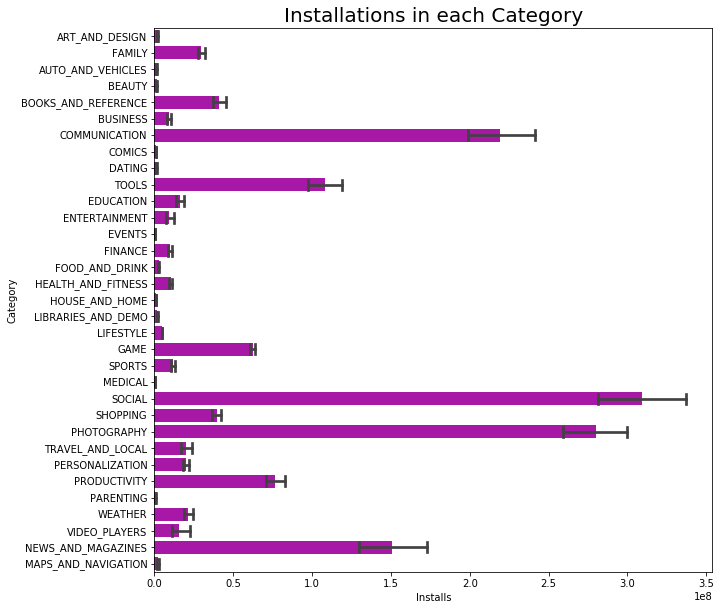

In [20]:
# barplot Installations and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Category", data=data_clean, capsize=.6, color='m')
plt.title('Installations in each Category',size = 20)

Text(0.5, 1.0, 'Category and size')

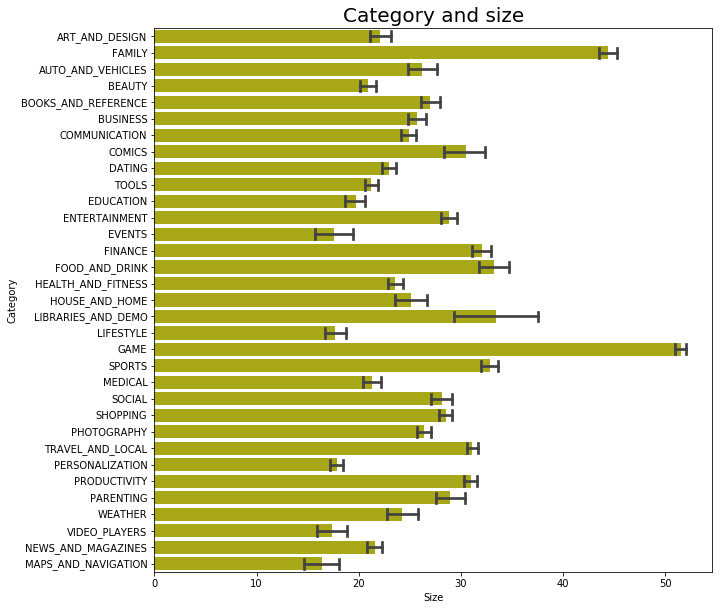

In [21]:
# barplot size and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Size", y="Category", data=data_clean, capsize=.6, color='y')
plt.title('Category and size',size = 20)

Text(0.5, 1.0, 'Price each Category')

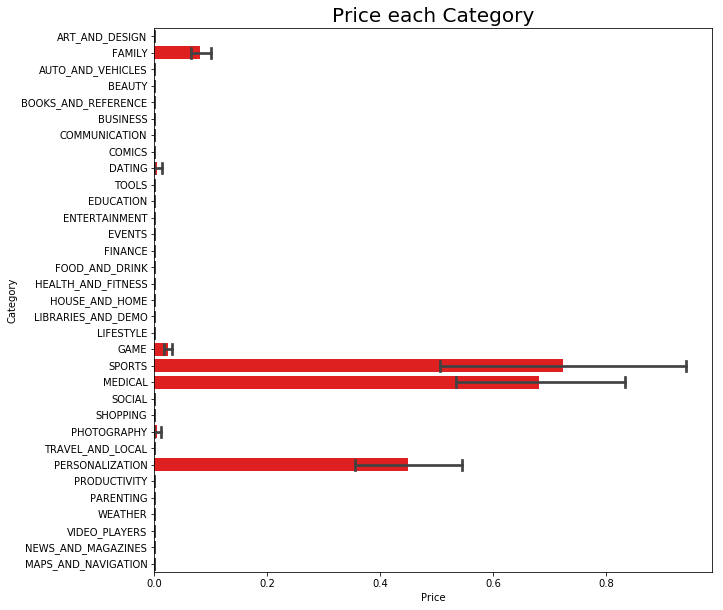

In [22]:
# barplot Installations and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Price", y="Category", data=data_clean, capsize=.6, color='r')
plt.title('Price each Category',size = 20)

Text(0.5, 1.0, 'Installations in each Category')

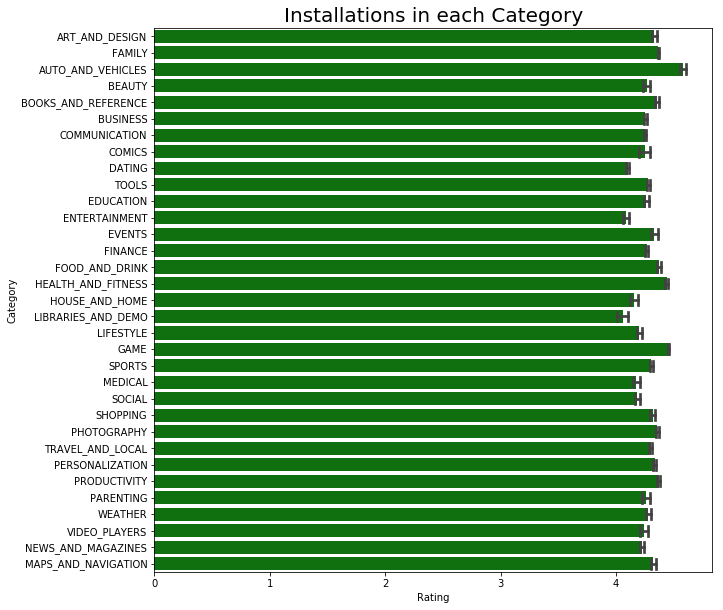

In [23]:
# barplot Installations and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Rating", y="Category", data=data_clean, capsize=.6, color='g')
plt.title('Installations in each Category',size = 20)

Text(0.5, 1.0, 'Installations by Android ver')

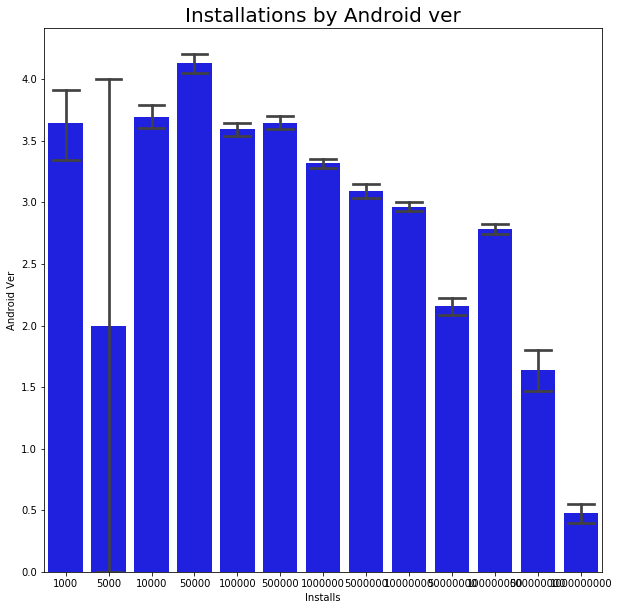

In [24]:
# barplot Installations and android version
plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Android Ver", data=data_clean, capsize=.6, color='b')
plt.title('Installations by Android ver',size = 20)

In [25]:
# Feature Genre

In [26]:
len(data_clean['Genres'].unique())

73

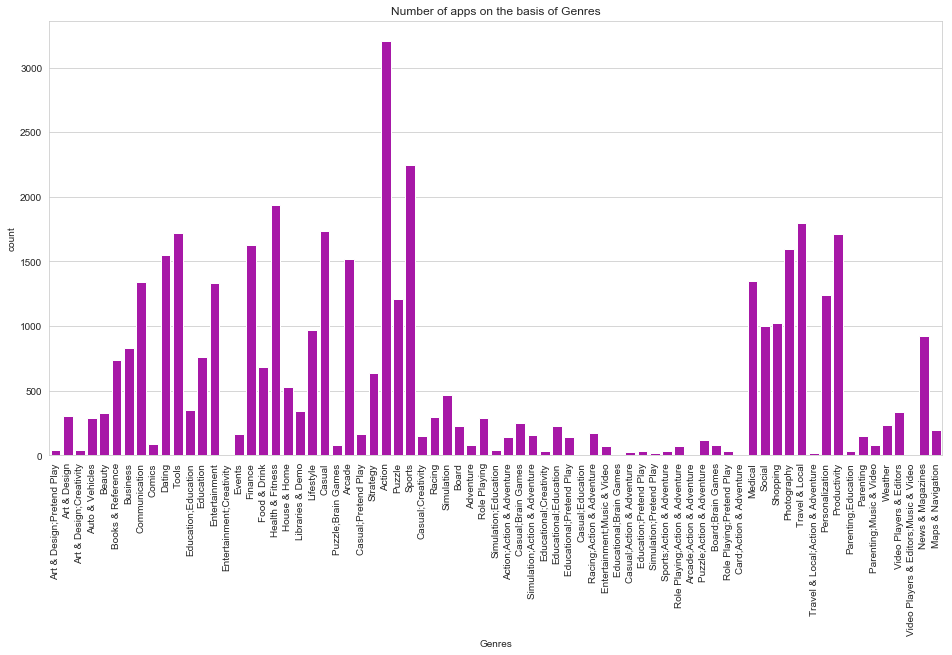

In [27]:
# number of apps by Genres
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Number of apps on the basis of Genres')
sns.countplot(x='Genres',data = data_clean, color='m')
plt.xticks(rotation=90)
plt.show()

In [28]:
# Feature type

In [29]:
data_clean['Type'].unique()

array(['Free', 'Paid'], dtype=object)

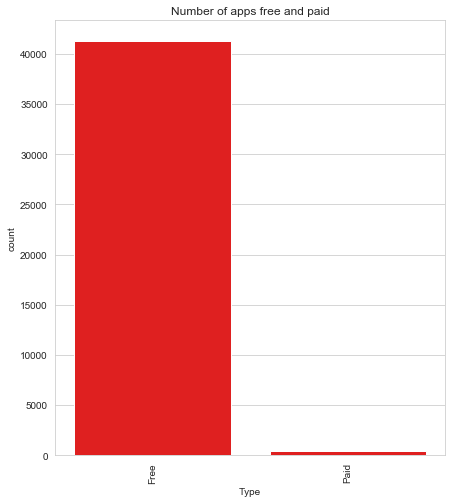

In [30]:
# number of apps by Genres
sns.set_style('whitegrid')
plt.figure(figsize=(7,8))
plt.title('Number of apps free and paid')
sns.countplot(x='Type',data = data_clean, color='r')
plt.xticks(rotation=90)
plt.show()

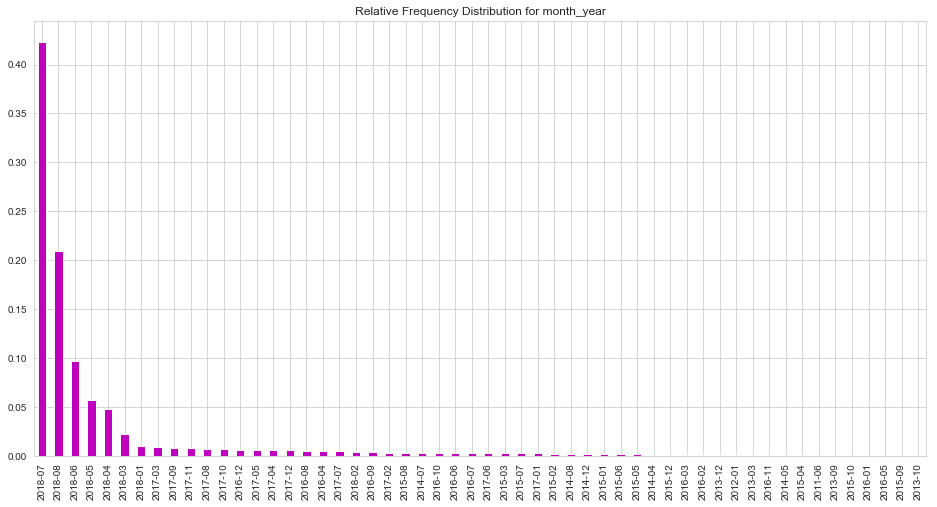

In [31]:
# Feature month_year
# Visualize frequencies of each value of 'month_year'
plt.figure(figsize=(16,8))
content_month_year = data_clean['month_year']
relative_freqs_type = content_month_year.value_counts(normalize=True)
_=relative_freqs_type.plot(kind='bar', color='m')
_=plt.title('Relative Frequency Distribution for month_year')

In [32]:
# check seasonality study (supplemental material notebook)

In [33]:
# Feature content rating

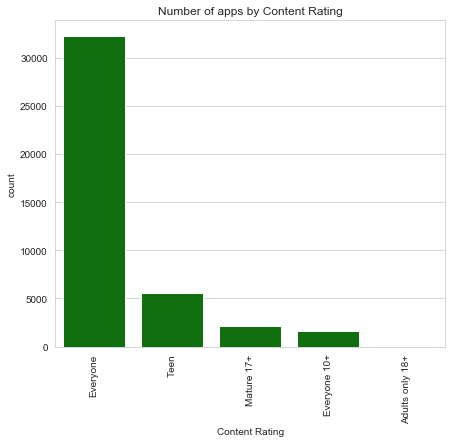

In [34]:
# number of apps by Content Rating
sns.set_style('whitegrid')
plt.figure(figsize=(7,6))
plt.title('Number of apps by Content Rating')
sns.countplot(x='Content Rating',data = data_clean, color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# UNIVARIATE

In [ ]:
# UNIVARIATE # Overview of all the numerical variables

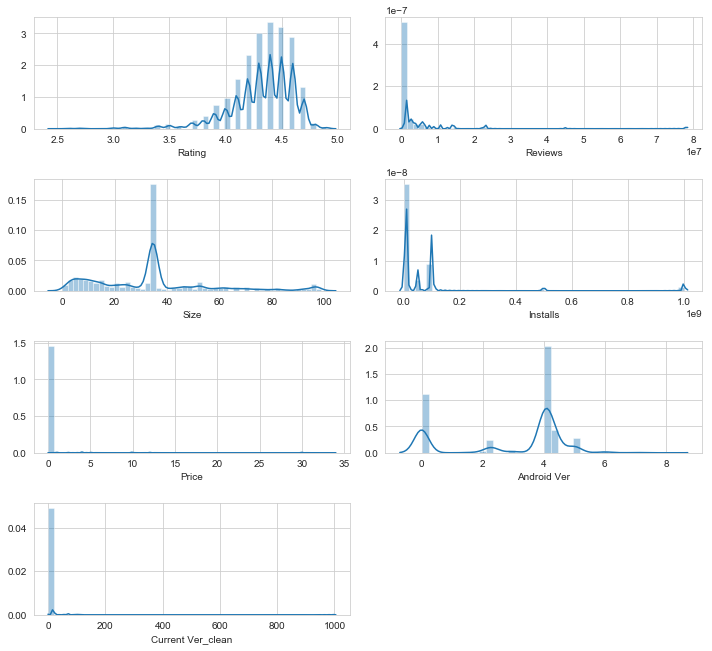

In [80]:
# Plot all numeric variable distributions and check if they are continuous or categorical
numerical = ['Rating','Reviews','Size','Installs','Price','Android Ver','Current Ver_clean']

# Visualize distributions in a grid
plt.figure(figsize=(10,20))
for i, feature in enumerate(numerical):
    plt.subplot(9, 2, i+1)
    sns.distplot(data_clean[feature])
    plt.grid(True)
plt.tight_layout()

# Bivariate analysis

In [94]:
# check the data content of each feature and assign a type based on your understanding
numerical = ['Rating','Reviews','Size','Installs','Price','Android Ver','Current Ver_clean']

#nominal = ['type','App' 'category', 'Genres','Content Rating', 'month', 'year', 'day', 'month_year','Category']

# Continuous/Continuous

In [95]:
#Visualize in reg plots the correlation between each pair of cardinal variable

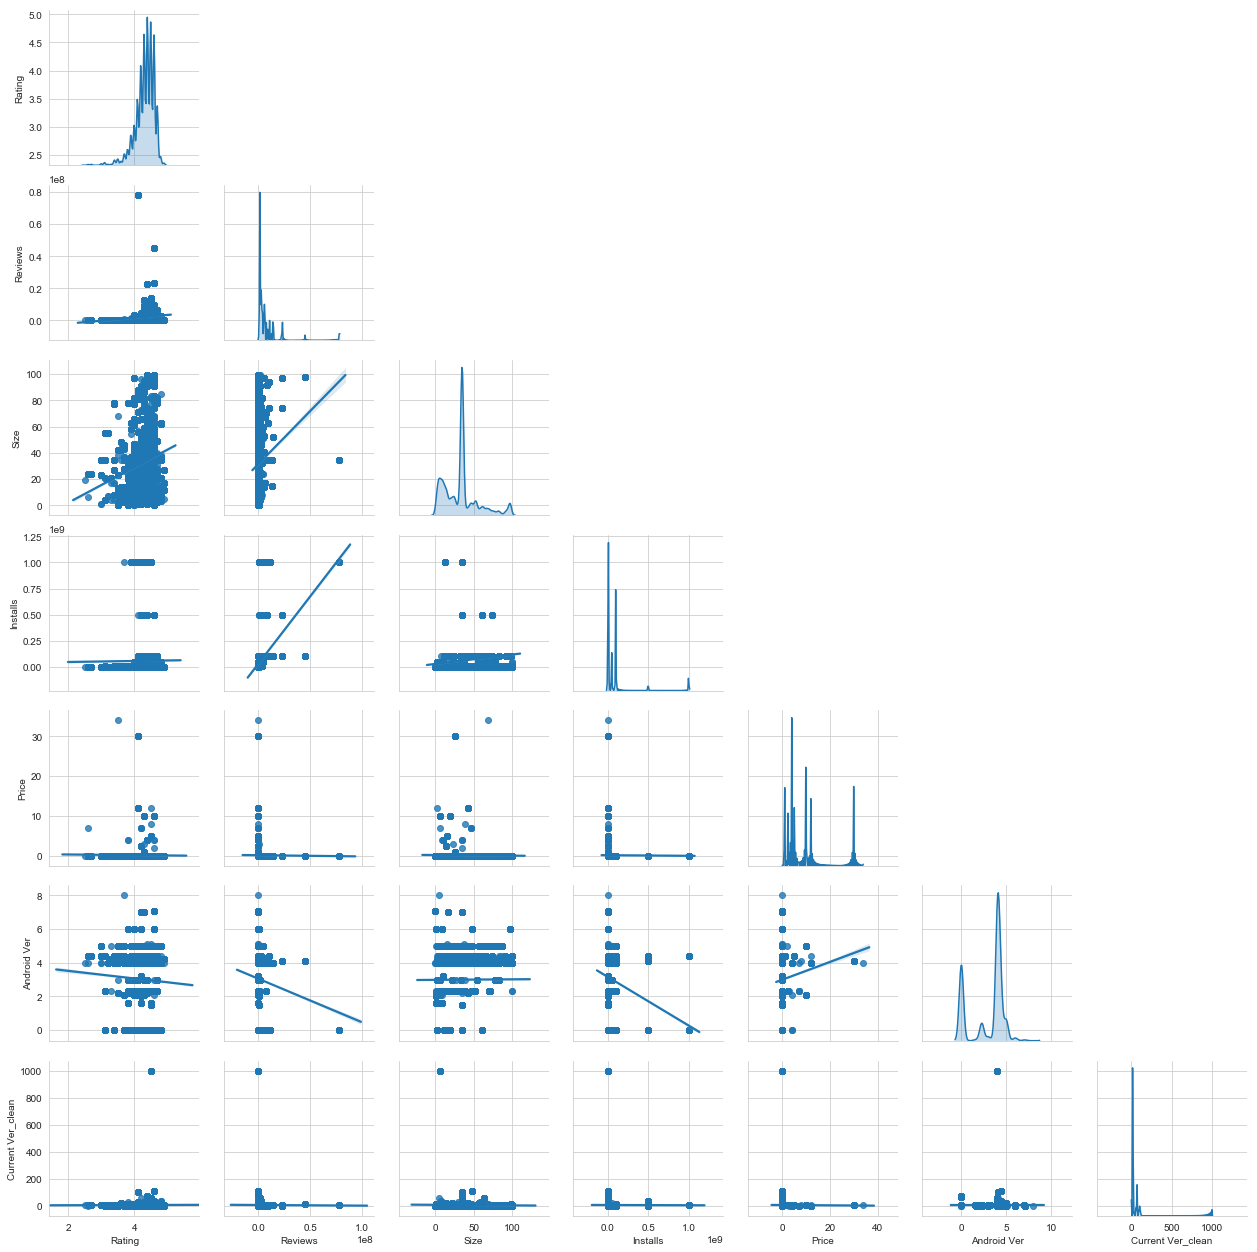

In [96]:
# check the data content of each feature and assign a type based on your understanding
numerical = ['Rating','Reviews','Size','Installs','Price','Android Ver','Current Ver_clean']

#nominal = ['type','App' 'category', 'Genres','Content Rating', 'month', 'year', 'day', 'month_year','Category']
# Build the correlation grid of cardinal variables with seaborn (tip: check pairplot kind reg)
plot=sns.pairplot(data_clean[numerical], kind="reg", diag_kind='kde')

# Show only the lower triangle of the matrix
for i, j in zip(*np.triu_indices_from(plot.axes, 1)):
    plot.axes[i, j].set_visible(False)

In [ ]:
# number of reviews is positively correlated to size and number of downloads(installs)
# android version is negatively correlated to number of installs
# app size is positively correlated to ratings

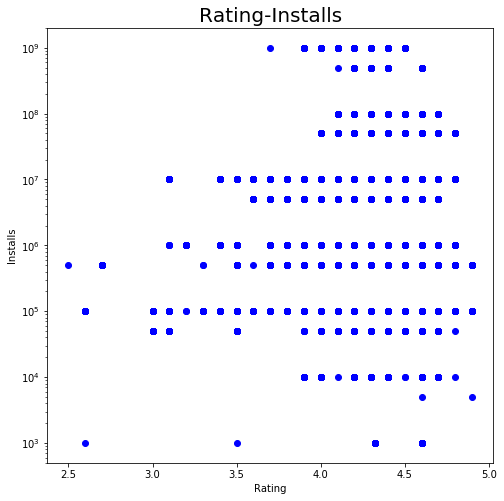

In [12]:
plt.figure(figsize=(8,8))
plt.scatter( x=data_clean['Rating'], y=data_clean['Installs'] , color = 'blue')
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating-Installs',size = 20)
plt.show()

In [98]:
# Calculate the Pearson Coefficient and find most correlated pairs
# build the correlation matrix with the calculation of the pearson coefficient (tip: check pandas .corr() method)
correlation_matrix = data_clean[cardinal].corr(method='pearson')

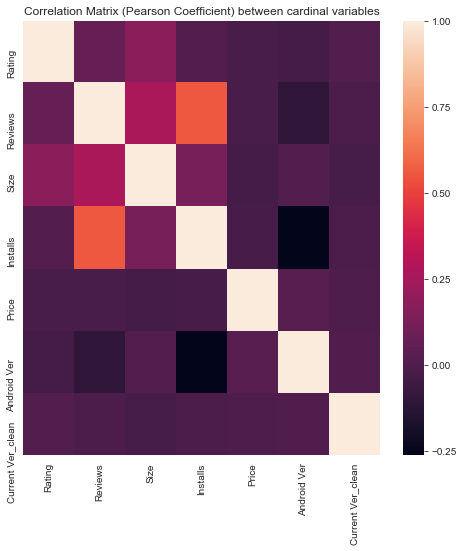

In [129]:
# Calculate the Pearson Coefficient and find most correlated pairs
# build the correlation matrix with the calculation of the pearson coefficient (tip: check pandas .corr() method)
correlation_matrix = data_clean[cardinal].corr(method='pearson')
# visualize correlation matrix in a heatmap
_=plt.figure(figsize=(8,8))
_=sns.heatmap(correlation_matrix)
_=plt.title('Correlation Matrix (Pearson Coefficient) between cardinal variables')

# Categorical/Categorical

# Analysis of correlation between all pairs of nominal (categorical) variables
1. Contingency Tables

2. Odds Ratio

3. Chi-Squared

In [108]:
#nominal = ['Type','App' 'category', 'Genres','Content Rating', 'month', 'year', 'day', 'month_year','Category']


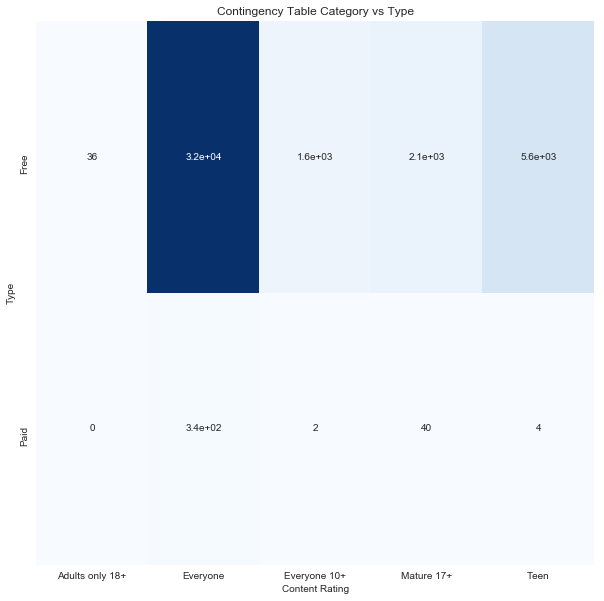

In [135]:
# Visualize the contingency table Category and Type
plt.figure(figsize=(10,10))
_=sns.heatmap(pd.crosstab(data_clean['Type'], data_clean['Content Rating']),
            cmap="Blues", annot=True, cbar=False)
_=plt.title("Contingency Table Category vs Type")

# Cardinal/Nominal

# Is there correlation between cardinal and nominal variables?


In [ ]:
# App ratings across categories - One Way Anova Test

Text(0, 0.5, 'Frequency')

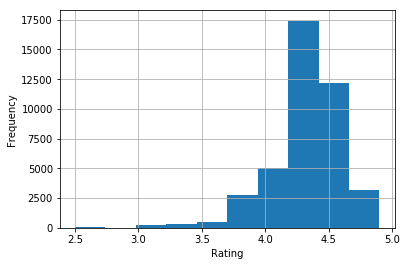

In [10]:
data_clean['Rating'].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [28]:
data_clean[['Category','Rating']].groupby('Category').mean()


,Rating
Category,
ART_AND_DESIGN,4.331694
AUTO_AND_VEHICLES,4.578767
BEAUTY,4.263385
BOOKS_AND_REFERENCE,4.350543
BUSINESS,4.251267
COMICS,4.248315
COMMUNICATION,4.247732
DATING,4.100129
EDUCATION,4.261219


In [29]:
df2=data_clean[['Category','Rating']].groupby('Category').mean()

In [ ]:
data_clean['Rating'].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [ ]:
# Show if there is any difference on the correlation between cardinal variables per each type of post
#cardinals_type = cardinal[:9] + ['type']

# Build the correlation grid of pairs of cardinal variables depending on the post type
#plot=sns.pairplot(data[cardinals_type], hue='type', kind="reg", diag_kind='kde')

# Show only the lower triangle of the matrix
#for i, j in zip(*np.triu_indices_from(plot.axes, 1)):
#    plot.axes[i, j].set_visible(False)

In [111]:
# OR and fisher test

# pvalues = []
oddsratios = []
fv.columns.tolist()
factors = list_wo_treat
for factor in factors:
    # Calculate contingency tables for treatment and each other boolean feature
    cont_table = pd.crosstab(fv['treatment'], fv[factor]).as_matrix()
    
    # Perform F-exact test to analyze if the odds ratio is significant
    oddsratio, pvalue = stats.fisher_exact(cont_table)
    
    pvalues.append(pvalue)
    oddsratios.append(oddsratio)

odds_ratio_analysis = pd.DataFrame({'factors':factors, 'p-value':pvalues, 
                                    'oddsratio':oddsratios}).sort_values(by='oddsratio')

# factors with p value<0.05
plt.figure(figsize=(12,8))
_=sns.barplot(x='oddsratio', y='factors', data=odds_ratio_analysis[odds_ratio_analysis['p-value']<0.05], color='b')